In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


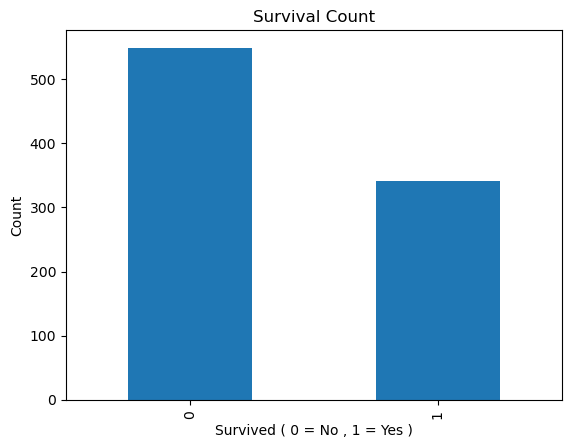

In [5]:
# How many survived vs not survived
df["Survived"].value_counts().plot(kind = "bar")
plt.xlabel("Survived ( 0 = No , 1 = Yes )")
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

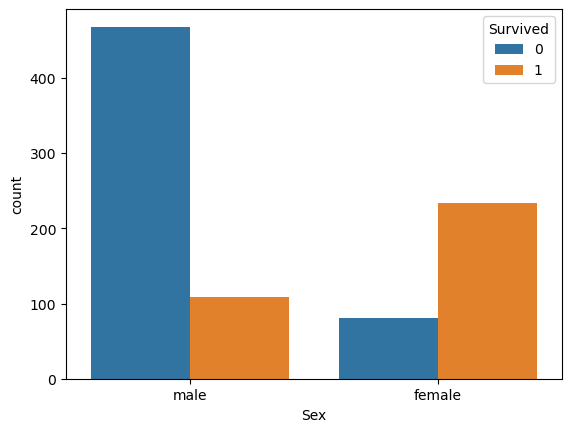

In [6]:
sns.countplot(x = "Sex",hue = "Survived",data = df)    # survival by gender 

Text(0.5, 1.0, 'Age Distribution')

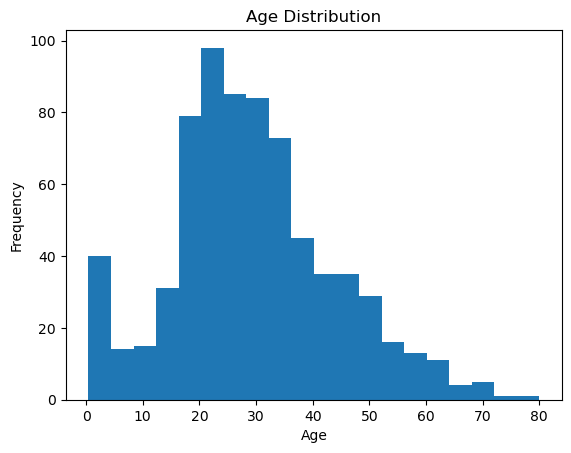

In [7]:
plt.hist(df["Age"],bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

<Axes: xlabel='Pclass', ylabel='Fare'>

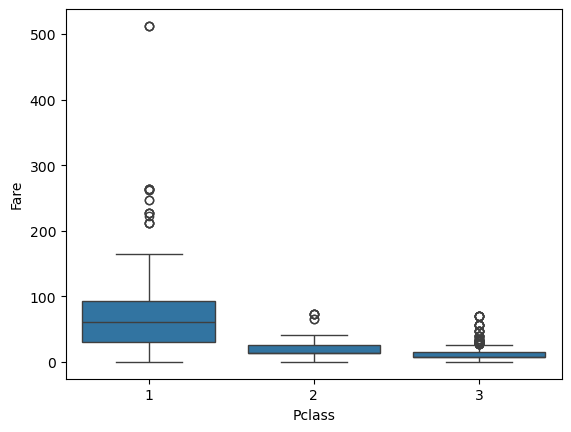

In [8]:
 # fare by passanger class
sns.boxplot(x = "Pclass",y = "Fare", data = df)

<Axes: xlabel='Pclass'>

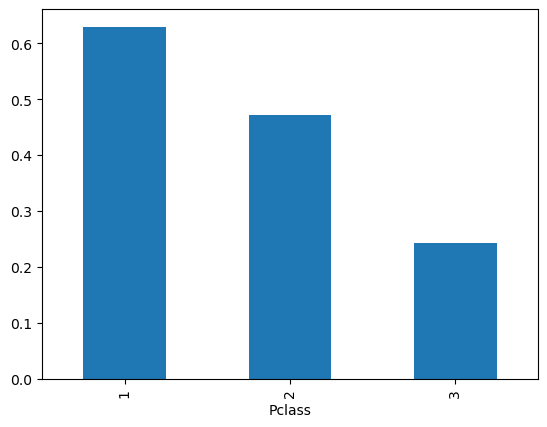

In [9]:
# Survival rate by class
df.groupby("Pclass")["Survived"].mean().plot(kind = "bar")

In [10]:
# use boolean indexing with multiple condition and count rows using shape[0]
df[df["Age"] > 50].shape[0]   #Passengers older than 50

64

In [11]:
df[(df["Pclass"] == 3) & (df["Sex"] == "female")].shape[0]  

144

In [12]:
# Passengers who did not survive and paid fare > 30
df[(df["Survived"] == 0) & (df["Fare"] > 30)].shape[0]

98

In [13]:
df[df["Embarked"] == "S"].shape[0]

644

In [14]:
df[df["Age"] < 12].shape[0]   # passangers which are under 12

68

In [15]:
df.groupby("Sex")["Survived"].mean()  # survival rate by gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [21]:
df.groupby(["Pclass","Sex"])["Survived"].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [17]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [18]:
df.groupby("Embarked")["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [32]:
avg_fare = df["Fare"].mean()
avg_fare

np.float64(32.204207968574636)

In [30]:
df.groupby(df["Fare"] > avg_fare)["Survived"].mean()

Fare
False    0.317647
True     0.597156
Name: Survived, dtype: float64

In [33]:
df["Fare_catagory"] = df["Fare"].apply(
    lambda x : "High Fare" if x > df["Fare"].mean() else "Low Fare"
)

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_catagory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Low Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,High Fare
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Low Fare
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,High Fare
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Low Fare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Low Fare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Low Fare
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Low Fare
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Low Fare


In [35]:
df.groupby("Fare_catagory")["Survived"].mean()

Fare_catagory
High Fare    0.597156
Low Fare     0.317647
Name: Survived, dtype: float64

In [38]:
df[(df["Sex"] == "female") & (df["Pclass"] == 2)]["Survived"].mean()

np.float64(0.9210526315789473)

In [41]:
df[(df["Age"] > 40)].groupby("Pclass")["Survived"].mean()

Pclass
1    0.513158
2    0.382353
3    0.075000
Name: Survived, dtype: float64

In [44]:
df[df["Fare"] > df["Fare"].mean()]["Survived"].mean()

np.float64(0.5971563981042654)

Text(0.5, 1.0, 'Survival Rate by Gender')

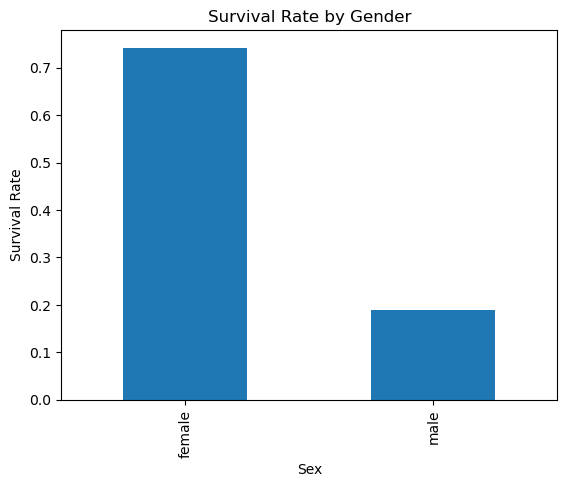

In [52]:
df.groupby("Sex")["Survived"].mean().plot(kind = "bar")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")

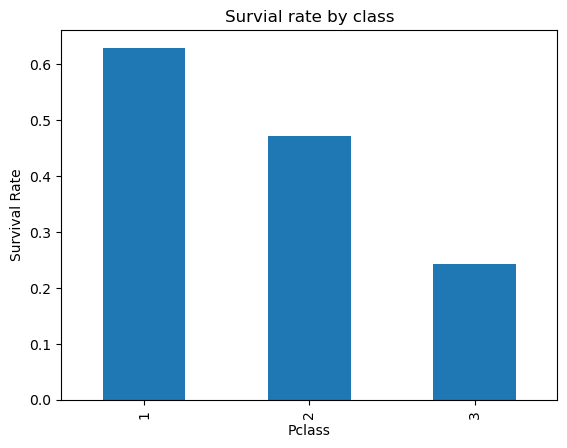

In [51]:
df.groupby("Pclass")["Survived"].mean().plot(kind = "bar")
plt.ylabel("Survival Rate")
plt.title("Survial rate by class")
plt.show()

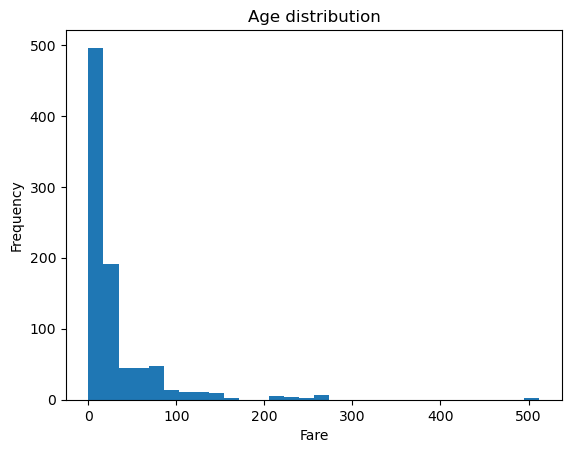

In [53]:
plt.hist(df["Fare"],bins = 30)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

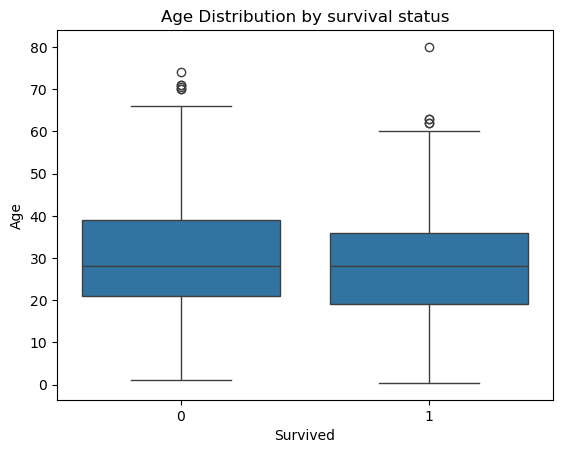

In [55]:
sns.boxplot(x = "Survived", y = "Age", data = df)
plt.title("Age Distribution by survival status")
plt.show()